In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-sep-2021/train.csv
/kaggle/input/tabular-playground-series-sep-2021/test.csv
/kaggle/input/tabular-playground-series-sep-2021/sample_solution.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

from xgboost import XGBClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train =  pd.read_csv('/kaggle/input/tabular-playground-series-sep-2021/train.csv')

# Exploratory Data Analyses - EDA

At first, lets do some EDA to get more acquainted with the dataset

Lets get some basic information about the dataset.

1 - Look at some samples with head function;

2 - Check how much rows does it has and also the data type of each of them;

3 - Look at some central tendency metrics.

In [5]:
df_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957919 entries, 0 to 957918
Columns: 120 entries, id to claim
dtypes: float64(118), int64(2)
memory usage: 877.0 MB


In [7]:
print('Dataset shape: ', df_train.shape )

Dataset shape:  (957919, 120)


In [8]:
df_train.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,957919.000000,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,9.425460e+05,9.426700e+05,...,942554.000000,942420.000000,942509.000000,942686.000000,942481.000000,942360.000000,9.423300e+05,942512.000000,942707.000000,957919.000000
mean,478959.000000,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,3.771642e+05,1.806054e+15,...,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,4.276905e+16,3959.204669,0.559267,0.498492
std,276527.540591,0.043564,0.146251,6415.829440,0.212510,0.145343,2.123777,1276.281403,3.454325e+05,2.335204e+15,...,18.578439,0.895793,45.581360,10.088848,92435.016241,0.114959,6.732441e+16,3155.991777,0.408426,0.499998
min,0.000000,-0.149910,-0.019044,-9421.700000,-0.082122,-0.006990,-12.791000,-224.800000,-2.984300e+04,-1.153300e+15,...,-105.860000,0.277040,-27.691000,-26.589000,-81977.000000,0.905270,-8.944400e+15,-415.240000,-0.151240,0.000000
25%,239479.500000,0.070227,0.283050,418.430000,0.035086,0.240520,-1.120700,481.545000,9.120900e+04,1.153100e+13,...,-28.812000,1.487700,-0.628880,-4.473975,2443.200000,1.146800,2.321100e+14,1306.200000,0.276560,0.000000
50%,478959.000000,0.090135,0.389100,1279.500000,0.137000,0.327790,-0.380110,1446.100000,2.896700e+05,5.043050e+14,...,-14.636000,1.662100,1.727700,0.885710,19479.000000,1.177200,1.327500e+16,3228.000000,0.473440,0.000000
75%,718438.500000,0.116500,0.458450,4444.400000,0.297100,0.412830,0.921940,2495.900000,5.605600e+05,3.103100e+15,...,-5.325300,2.522325,18.991000,6.840775,88488.000000,1.242000,5.278700e+16,6137.900000,0.746210,1.000000
max,957918.000000,0.415170,0.518990,39544.000000,1.319900,0.554750,11.202000,5426.600000,1.913700e+06,1.042400e+16,...,1.613400,4.565900,217.840000,47.757000,526050.000000,1.886700,3.249900e+17,13151.000000,2.743600,1.000000


Lets do some statistics on missing values

In [9]:
df_train.isna().sum()

id           0
f1       15247
f2       15190
f3       15491
f4       15560
         ...  
f115     15559
f116     15589
f117     15407
f118     15212
claim        0
Length: 120, dtype: int64

<BarContainer object of 120 artists>

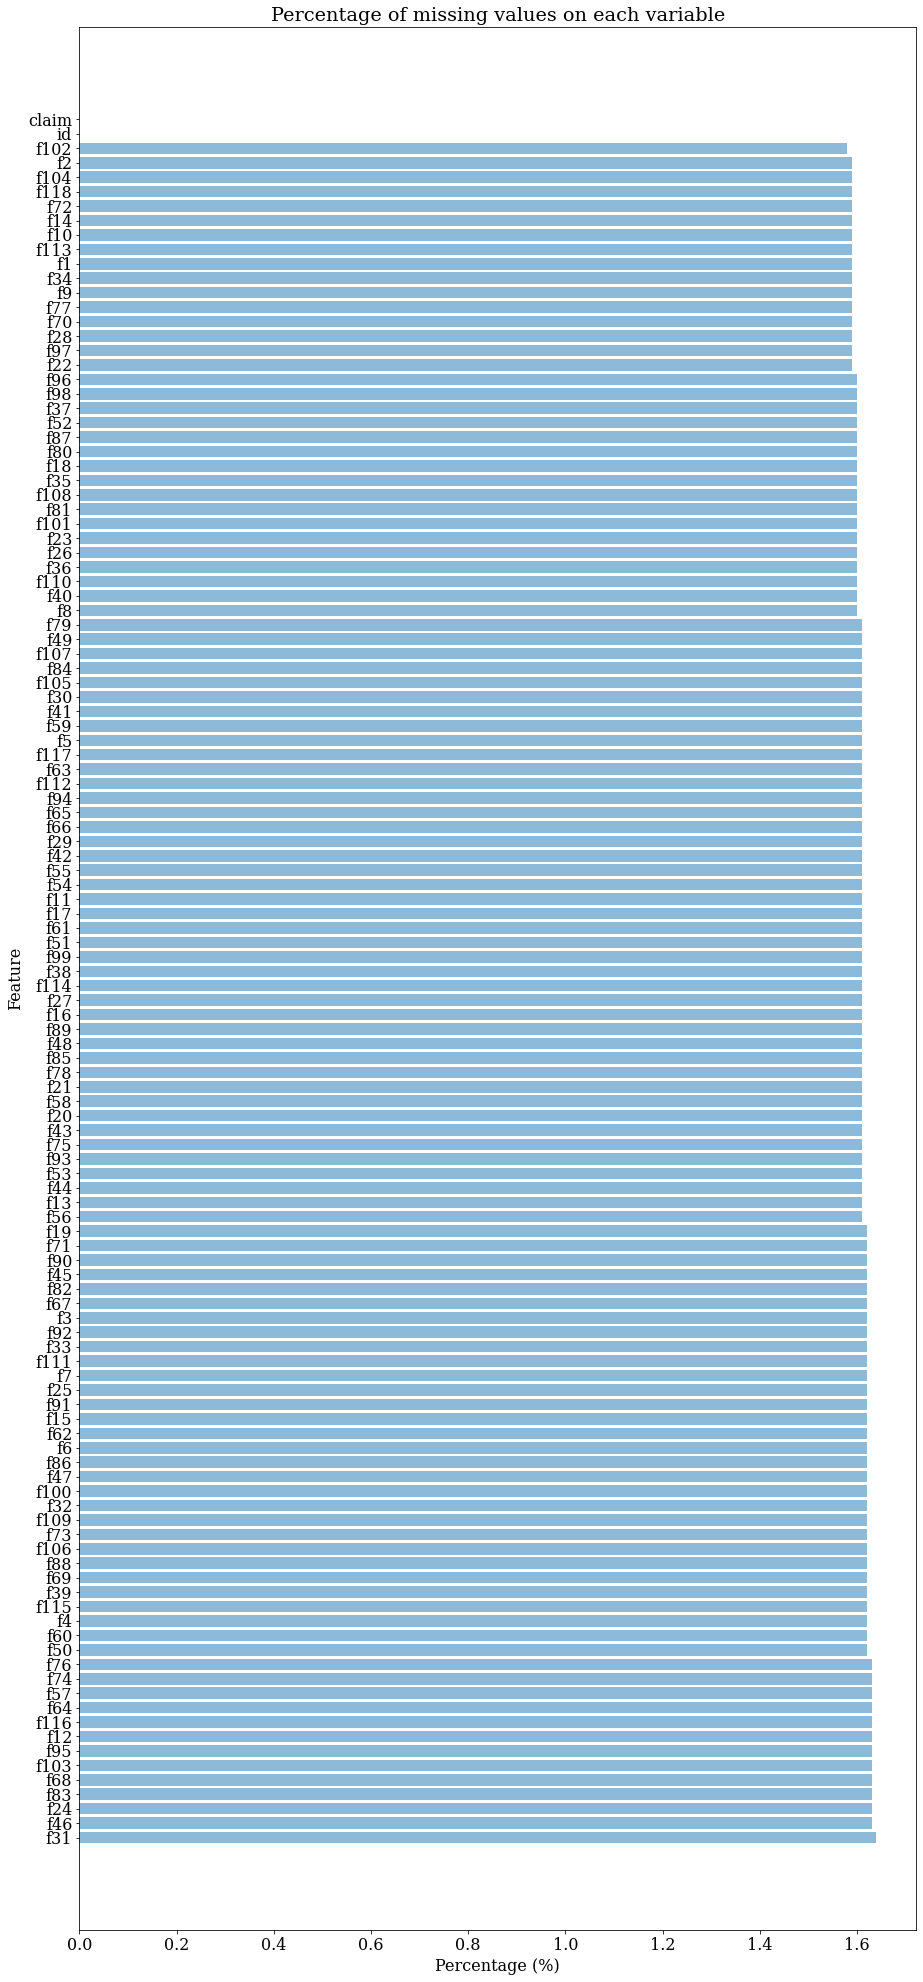

In [10]:
miss_perc = df_train.isnull().sum()/df_train.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc('font', family='serif', size=16)
plt.figure(figsize=(15,35))
plt.title('Percentage of missing values on each variable')
plt.xlabel('Percentage (%)')
plt.ylabel('Feature')
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

# for column in df_train.columns :
#   print(column + ' ' + '%.2f' % miss_perc[column] + '%')

As can be seen, all featuares have almost the same quantity of missing values. The maximum percentage of missing values does not surpass the 1.6% of the overall data available. Given the quiantity of data available, during the modeling, we will stick with the strategy of drop the rows with missing values, however we will also impute with mean value as a baseline.

Now lets verify how is the target variable distributed

Text(0, 0.5, 'Count')

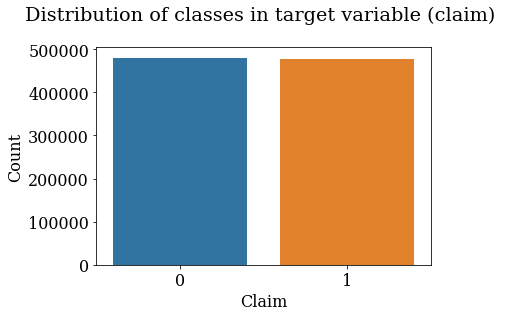

In [11]:
# plt.figure(figsize=(6,4))
# plt.hist(df_train['claim'], bins=2, color='#3498db', histtype='bar', edgecolor='white') 
sns.countplot(df_train['claim'])
plt.title('Distribution of classes in target variable (claim) \n')
plt.xlabel('Claim')
plt.ylabel('Count')

As we can see, they are equally distributed, thus we won't need to do any kind of special treatment to deal with imbalance.

# Feature Selection

Since we have a lot of features, it will be too much work to analyse one of them at once alone. Thus, lets use some method to help analysing those features that are most important to our analyses.

# Mutual Information

In [12]:
x = df_train.copy().drop('id', axis=1)
x.dropna(inplace=True)
y = x.pop('claim')

In [13]:
discrete_features = x.dtypes == int

In [14]:
def make_mi_scores(x, y, discrete_features):
    mi_scores = mutual_info_classif(x, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [15]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [16]:
mi_scores = make_mi_scores(x, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

f108    0.001592
f48     0.001220
f71     0.001173
f35     0.001039
f9      0.000945
f95     0.000876
f84     0.000724
f25     0.000680
f79     0.000587
f87     0.000561
f57     0.000542
f34     0.000528
f47     0.000423
f50     0.000361
f16     0.000291
f13     0.000253
f1      0.000203
f83     0.000183
f106    0.000124
f114    0.000056
f22     0.000001
f85     0.000000
f101    0.000000
f100    0.000000
f99     0.000000
f104    0.000000
f44     0.000000
f33     0.000000
f27     0.000000
f20     0.000000
f14     0.000000
f6      0.000000
f43     0.000000
f49     0.000000
f72     0.000000
f66     0.000000
f63     0.000000
f59     0.000000
f53     0.000000
f118    0.000000
Name: MI Scores, dtype: float64

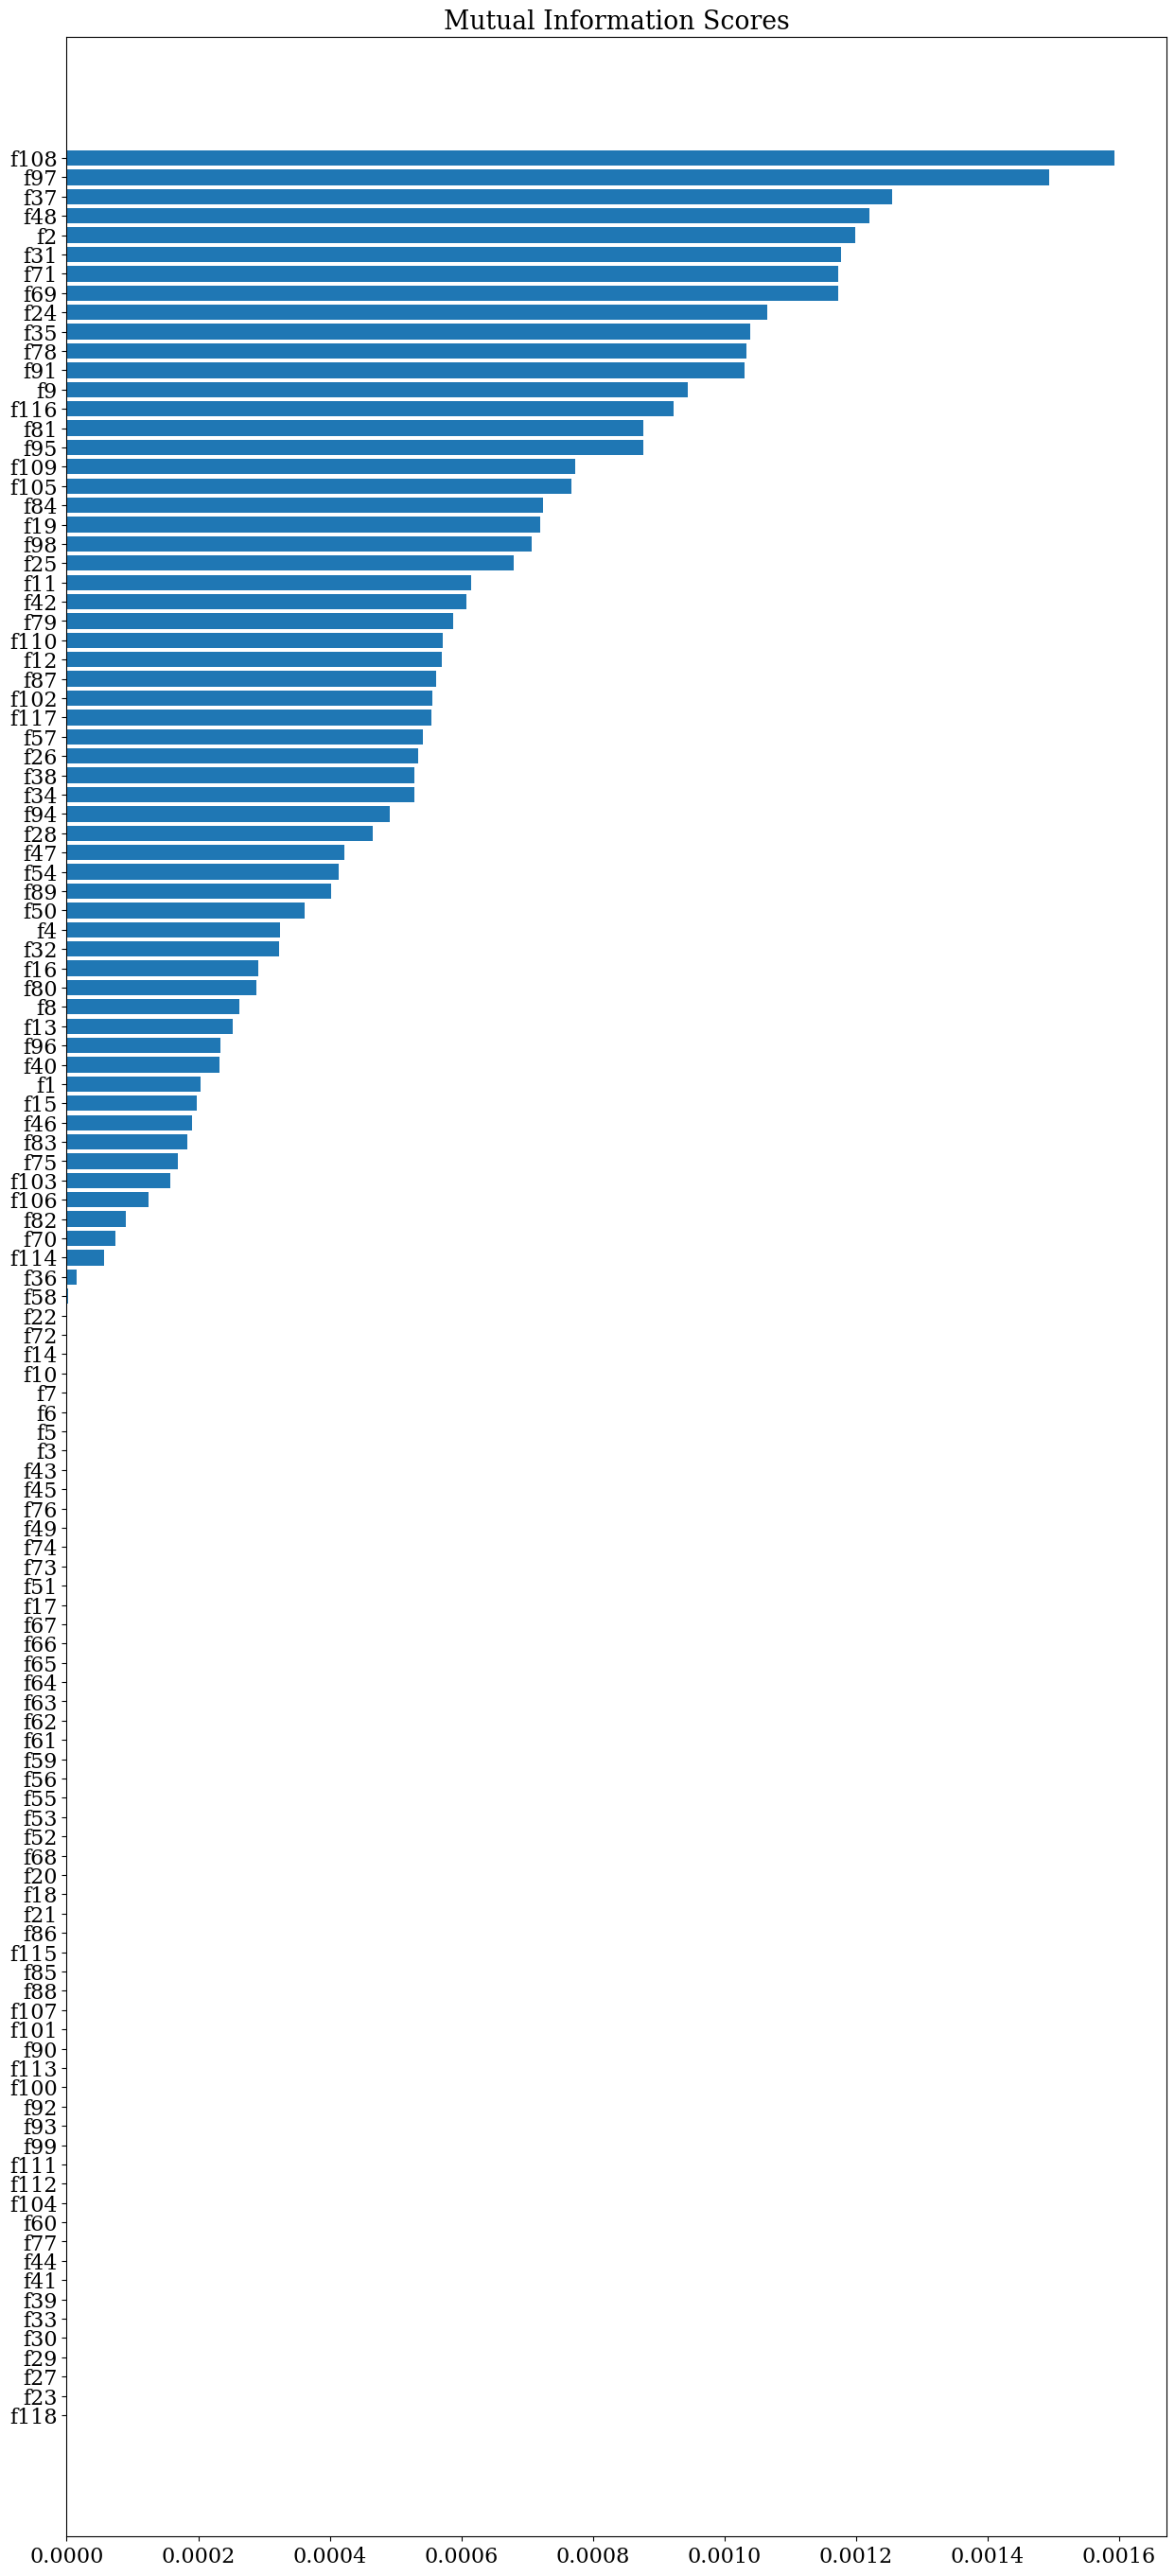

In [17]:
plt.figure(dpi=100, figsize=(15, 35))
plot_mi_scores(mi_scores)

In [18]:
print('There are ', (mi_scores == 0).value_counts()[True], ' features with 0 score out of 118 features.')

There are  57  features with 0 score out of 118 features.


In [19]:
def evaluate_metrics(model, x, y):
    y_pred = model.predict(x)
    acc = accuracy_score(y, y_pred)
    y_pred_prob = model.predict_proba(x)[:, 1]
    auc_roc = roc_auc_score(y, y_pred_prob)
    return {'accuracy' : acc, 'auc_roc_curve' : auc_roc}

# Baseline

Lets use to baseline models to choose the methods that will allow the model to achieve a good performance.

1 - Logistic Regression

2 - XGBoost

All the tests will be based on a fraction of 20% of all available data

# Strategy 1

<ul>
    <li><h3>Impute values with mean</h3></li>
    <li><h3>Use all features</h3></li>
</ul>

In [20]:
df_subset = df_train.sample(frac=.20, random_state=42)
x = df_subset.drop(['id', 'claim'], axis=1)
y = df_subset['claim']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Using 80% of data for training and 20% for testing the baseline models")
print('x_train', x_train.shape, 'y_train', y_train.shape)
print('x_valid', x_valid.shape, 'y_valid', y_valid.shape)

# Impute and Scale the values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train = imputer.fit_transform(x_train)
x_valid = imputer.transform(x_valid)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

Using 80% of data for training and 20% for testing the baseline models
x_train (153267, 118) y_train (153267,)
x_valid (38317, 118) y_valid (38317,)


In [21]:
# Logisct Classifier
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
model.score(x_valid, y_valid)
results = evaluate_metrics(model, x_valid, y_valid)
# y_pred_prob = model.predict_proba(x_valid)[:, 1]
# auc_roc = roc_auc_score(y_pred_prob, y_valid)
print(results)

{'accuracy': 0.5265286948351906, 'auc_roc_curve': 0.5389288394571753}


In [22]:
y_pred = model.predict(x_valid)
accuracy_score(y_valid, y_pred)

0.5265286948351906

In [23]:
# XGBoost Classifier
model = XGBClassifier(random_state=0, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
# accuracy_score(y_valid, y_pred)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.6954615444841715, 'auc_roc_curve': 0.7431899003659905}


In [24]:
# XGBoost Classifier - 10 estimators
model = XGBClassifier(n_estimators=10, random_state=0, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.5949056554531931, 'auc_roc_curve': 0.6243939033122846}


# Strategy 2

<ul>
    <li><h3>Impute values with mean</h3></li>
    <li><h3>Use features whose mutual information is bigger than 0</h3></li>
</ul>

In [25]:
df_subset = df_train.sample(frac=.20, random_state=42)
df_subset = df_subset.drop(mi_scores[mi_scores == 0].index, axis=1)

x = df_subset.drop(['id', 'claim'], axis=1)
y = df_subset['claim']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Using 80% of data for training and 20% for testing the baseline models")
print('x_train', x_train.shape, 'y_train', y_train.shape)
print('x_valid', x_valid.shape, 'y_valid', y_valid.shape)

# Impute and Scale the values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train = imputer.fit_transform(x_train)
x_valid = imputer.transform(x_valid)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

Using 80% of data for training and 20% for testing the baseline models
x_train (153267, 61) y_train (153267,)
x_valid (38317, 61) y_valid (38317,)


In [26]:
# Logisct Classifier
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.5246496333220242, 'auc_roc_curve': 0.532241302271639}


In [27]:
# XGBoost Classifier
model = XGBClassifier(random_state=0, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

# y_pred = model.predict(x_valid)
# predictions = [round(value) for value in y_pred]
# accuracy_score(y_valid, predictions)

{'accuracy': 0.6643526372106375, 'auc_roc_curve': 0.7057218026904406}


In [28]:
# XGBoost Classifier - 10 estimators
model = XGBClassifier(n_estimators=10, random_state=0, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.5938878304668946, 'auc_roc_curve': 0.6242139599606955}


# Strategy 3

<ul>
    <li><h3>Drop rows with nans</h3></li>
    <li><h3>Use all features</h3></li>
</ul>

In [29]:
df_subset = df_train.sample(frac=.20, random_state=42)
df_subset = df_subset.dropna()

x = df_subset.drop(['id', 'claim'], axis=1)
y = df_subset['claim']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Using 80% of data for training and 20% for testing the baseline models")
print('x_train', x_train.shape, 'y_train', y_train.shape)
print('x_valid', x_valid.shape, 'y_valid', y_valid.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

Using 80% of data for training and 20% for testing the baseline models
x_train (57483, 118) y_train (57483,)
x_valid (14371, 118) y_valid (14371,)


In [30]:
# Logisct Classifier
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.8625704543873077, 'auc_roc_curve': 0.5386886745826542}


In [31]:
# XGBoost Classifier
model = XGBClassifier(random_state=0, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.8599958249251966, 'auc_roc_curve': 0.5351068944249063}


In [32]:
# XGBoost Classifier - 10 estimators
model = XGBClassifier(n_estimators=10, random_state=0, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.8625008698072507, 'auc_roc_curve': 0.5236761756548662}


# Strategy 4

<ul>
    <li><h3>Drop rows with nans</h3></li>
    <li><h3>Use features whose mutual information is bigger than 0</li>
</ul>

In [33]:
df_subset = df_train.sample(frac=.20, random_state=42)
df_subset = df_subset.drop(mi_scores[mi_scores == 0].index, axis=1)
df_subset = df_subset.dropna()

x = df_subset.drop(['id', 'claim'], axis=1)
y = df_subset['claim']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Using 80% of data for training and 20% for testing the baseline models")
print('x_train', x_train.shape, 'y_train', y_train.shape)
print('x_valid', x_valid.shape, 'y_valid', y_valid.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

Using 80% of data for training and 20% for testing the baseline models
x_train (75811, 61) y_train (75811,)
x_valid (18953, 61) y_valid (18953,)


In [34]:
# Logistic Classifier
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.7394080092861288, 'auc_roc_curve': 0.5329034630657283}


In [35]:
# XGBoost Classifier
model = XGBClassifier(random_state=0, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.7282224449955153, 'auc_roc_curve': 0.5180432040120236}


In [36]:
# XGBoost Classifier
model = XGBClassifier(n_estimators=10, random_state=0, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.7386693399461827, 'auc_roc_curve': 0.5220537929660656}


# Strategy 5

<ul>
    <li><h3>Use strategy 1</h3></li>
    <li><h3>Create a sintetic feature. Counting the number of nan values. This was as tip from the discussion board</ul>

In [37]:
df_subset = df_train.sample(frac=.20, random_state=42)
x = df_subset.drop(['id', 'claim'], axis=1)
x["nan_count"] = x.isnull().sum(axis=1)
y = df_subset['claim']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Using 80% of data for training and 20% for testing the baseline models")
print('x_train', x_train.shape, 'y_train', y_train.shape)
print('x_valid', x_valid.shape, 'y_valid', y_valid.shape)

# Impute and Scale the values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train = imputer.fit_transform(x_train)
x_valid = imputer.transform(x_valid)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

Using 80% of data for training and 20% for testing the baseline models
x_train (153267, 119) y_train (153267,)
x_valid (38317, 119) y_valid (38317,)


In [38]:
# Logistic Classifier
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.7371140746926952, 'auc_roc_curve': 0.7991795904072667}


In [39]:
# XGBoost Classifier
model = XGBClassifier(random_state=0, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.7657175666153404, 'auc_roc_curve': 0.7992525535223916}


In [40]:
# XGBoost Classifier
model = XGBClassifier(n_estimators=10, random_state=0, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.7693451992588146, 'auc_roc_curve': 0.800514571013911}


# Strategy 6

<ul>
    <li><h3>Use strategy 2</h3></li>
    <li><h3>Create a sintetic feature. Counting the number of nan values.</ul>

In [41]:
df_subset = df_train.sample(frac=.20, random_state=42)
df_subset = df_subset.drop(mi_scores[mi_scores == 0].index, axis=1)

x = df_subset.drop(['id', 'claim'], axis=1)
x["nan_count"] = x.isnull().sum(axis=1)
y = df_subset['claim']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Using 80% of data for training and 20% for testing the baseline models")
print('x_train', x_train.shape, 'y_train', y_train.shape)
print('x_valid', x_valid.shape, 'y_valid', y_valid.shape)

# Impute and Scale the values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train = imputer.fit_transform(x_train)
x_valid = imputer.transform(x_valid)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

Using 80% of data for training and 20% for testing the baseline models
x_train (153267, 62) y_train (153267,)
x_valid (38317, 62) y_valid (38317,)


In [42]:
# Logistic Classifier
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.7122165096432393, 'auc_roc_curve': 0.7478279134836137}


In [43]:
# XGBoost Classifier
model = XGBClassifier(random_state=0, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.7283973171177284, 'auc_roc_curve': 0.7470176275605676}


In [44]:
# XGBoost Classifier
model = XGBClassifier(n_estimators=10, random_state=0, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
model.fit(x_train, y_train)
results = evaluate_metrics(model, x_valid, y_valid)
print(results)

{'accuracy': 0.7333298535897904, 'auc_roc_curve': 0.7473425285331445}


# Extreme Gradient Boosting (XGBoost) - Testing different configurations

In [45]:
from tqdm.notebook import tqdm

In [46]:
df_subset = df_train.sample(frac=.20, random_state=42)
x = df_subset.drop(['id', 'claim'], axis=1)
x["nan_count"] = x.isnull().sum(axis=1)
y = df_subset['claim']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Using 80% of data for training and 20% for testing the baseline models")
print('x_train', x_train.shape, 'y_train', y_train.shape)
print('x_valid', x_valid.shape, 'y_valid', y_valid.shape)

# Impute and Scale the values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train = imputer.fit_transform(x_train)
x_valid = imputer.transform(x_valid)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

Using 80% of data for training and 20% for testing the baseline models
x_train (153267, 119) y_train (153267,)
x_valid (38317, 119) y_valid (38317,)


In [47]:
import warnings
warnings.filterwarnings('ignore')

# 1 - Testing different number of estimators 

In [48]:
def get_models_n_estimators():
    models = dict()
    trees = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
    for n in trees:
        models[str(n)] = XGBClassifier(n_estimators=n, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
    return models

In [49]:
models = get_models_n_estimators()
results, names = list(), list()
i = 0

for name, model in tqdm(models.items()):
    model.fit(x_train, y_train, verbose=True)
    scores = evaluate_metrics(model, x_valid, y_valid)
    results.append(scores)
    names.append(name)
    print(name, 'accuracy: %.3f auc_roc: %.3f' % (results[i]['accuracy'], results[i]['auc_roc_curve']))
    i += 1

  0%|          | 0/18 [00:00<?, ?it/s]

10 accuracy: 0.769 auc_roc: 0.801
50 accuracy: 0.768 auc_roc: 0.802
100 accuracy: 0.766 auc_roc: 0.799
150 accuracy: 0.763 auc_roc: 0.797
200 accuracy: 0.760 auc_roc: 0.796
250 accuracy: 0.758 auc_roc: 0.795
300 accuracy: 0.757 auc_roc: 0.794
350 accuracy: 0.755 auc_roc: 0.794
400 accuracy: 0.754 auc_roc: 0.793
450 accuracy: 0.754 auc_roc: 0.793
500 accuracy: 0.753 auc_roc: 0.792
1000 accuracy: 0.752 auc_roc: 0.791
2000 accuracy: 0.757 auc_roc: 0.794
3000 accuracy: 0.757 auc_roc: 0.795
4000 accuracy: 0.758 auc_roc: 0.795
5000 accuracy: 0.760 auc_roc: 0.795
6000 accuracy: 0.759 auc_roc: 0.796
7000 accuracy: 0.759 auc_roc: 0.796


# 2 - Testing different max_depth 

In [50]:
def get_models_n_depths():
    models = dict()
    for i in range(1,20):
        models[str(i)] = XGBClassifier(max_depth=i, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
    return models

In [51]:
models = get_models_n_depths()
results, names = list(), list()
i = 0

for name, model in tqdm(models.items()):
    model.fit(x_train, y_train, verbose=True)
    scores = evaluate_metrics(model, x_valid, y_valid)
    results.append(scores)
    names.append(name)
    print(name, 'accuracy: %.3f auc_roc: %.3f' % (results[i]['accuracy'], results[i]['auc_roc_curve']))
    i += 1

  0%|          | 0/19 [00:00<?, ?it/s]

1 accuracy: 0.770 auc_roc: 0.808
2 accuracy: 0.770 auc_roc: 0.808
3 accuracy: 0.770 auc_roc: 0.807
4 accuracy: 0.768 auc_roc: 0.807
5 accuracy: 0.767 auc_roc: 0.803
6 accuracy: 0.766 auc_roc: 0.799
7 accuracy: 0.761 auc_roc: 0.795
8 accuracy: 0.758 auc_roc: 0.795
9 accuracy: 0.754 auc_roc: 0.791
10 accuracy: 0.756 auc_roc: 0.793
11 accuracy: 0.755 auc_roc: 0.792
12 accuracy: 0.757 auc_roc: 0.792
13 accuracy: 0.761 auc_roc: 0.793
14 accuracy: 0.760 auc_roc: 0.793
15 accuracy: 0.763 auc_roc: 0.793
16 accuracy: 0.762 auc_roc: 0.793
17 accuracy: 0.763 auc_roc: 0.795
18 accuracy: 0.763 auc_roc: 0.795
19 accuracy: 0.763 auc_roc: 0.794


# 3 - Testing different subsamples

In [52]:
def get_models_subsamples():
    models = dict()
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = XGBClassifier(subsample=i,  tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
    return models

In [53]:
models = get_models_subsamples()
results, names = list(), list()
i = 0

for name, model in tqdm(models.items()):
    model.fit(x_train, y_train, verbose=True)
    scores = evaluate_metrics(model, x_valid, y_valid)
    results.append(scores)
    names.append(name)
    print(name, 'accuracy: %.3f auc_roc: %.3f' % (results[i]['accuracy'], results[i]['auc_roc_curve']))
    i += 1

  0%|          | 0/10 [00:00<?, ?it/s]

0.1 accuracy: 0.716 auc_roc: 0.765
0.2 accuracy: 0.739 auc_roc: 0.783
0.3 accuracy: 0.748 auc_roc: 0.788
0.4 accuracy: 0.755 auc_roc: 0.794
0.5 accuracy: 0.758 auc_roc: 0.795
0.6 accuracy: 0.761 auc_roc: 0.797
0.7 accuracy: 0.762 auc_roc: 0.797
0.8 accuracy: 0.764 auc_roc: 0.799
0.9 accuracy: 0.763 auc_roc: 0.800
1.0 accuracy: 0.766 auc_roc: 0.799


# 4 - Testing different learning rates

In [54]:
def get_models_lr():
    models = dict()
    rates = [0.0001, 0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.12, 0.13, 0.3, 0.5, 1.0]
    for r in rates:
        key = '%.4f' % r
        models[key] = XGBClassifier(eta=r, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
    return models

In [55]:
models = get_models_lr()
results, names = list(), list()
i = 0

for name, model in tqdm(models.items()):
    model.fit(x_train, y_train, verbose=True)
    scores = evaluate_metrics(model, x_valid, y_valid)
    results.append(scores)
    names.append(name)
    print(name, 'accuracy: %.3f auc_roc: %.3f' % (results[i]['accuracy'], results[i]['auc_roc_curve']))
    i += 1

  0%|          | 0/13 [00:00<?, ?it/s]

0.0001 accuracy: 0.769 auc_roc: 0.798
0.0010 accuracy: 0.769 auc_roc: 0.799
0.0030 accuracy: 0.770 auc_roc: 0.801
0.0050 accuracy: 0.770 auc_roc: 0.802
0.0100 accuracy: 0.770 auc_roc: 0.802
0.0300 accuracy: 0.770 auc_roc: 0.804
0.0500 accuracy: 0.770 auc_roc: 0.805
0.1000 accuracy: 0.770 auc_roc: 0.805
0.1200 accuracy: 0.770 auc_roc: 0.806
0.1300 accuracy: 0.769 auc_roc: 0.806
0.3000 accuracy: 0.766 auc_roc: 0.799
0.5000 accuracy: 0.751 auc_roc: 0.789
1.0000 accuracy: 0.719 auc_roc: 0.766


# 5 - Testing different number of features

In [56]:
def get_models_nfeatures():
    models = dict()
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = XGBClassifier(colsample_bytree=i, tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0)
    return models

In [57]:
models = get_models_nfeatures()
results, names = list(), list()
i = 0

for name, model in tqdm(models.items()):
    model.fit(x_train, y_train, verbose=True)
    scores = evaluate_metrics(model, x_valid, y_valid)
    results.append(scores)
    names.append(name)
    print(name, 'accuracy: %.3f auc_roc: %.3f' % (results[i]['accuracy'], results[i]['auc_roc_curve']))
    i += 1

  0%|          | 0/10 [00:00<?, ?it/s]

0.1 accuracy: 0.768 auc_roc: 0.802
0.2 accuracy: 0.767 auc_roc: 0.803
0.3 accuracy: 0.765 auc_roc: 0.801
0.4 accuracy: 0.766 auc_roc: 0.801
0.5 accuracy: 0.766 auc_roc: 0.801
0.6 accuracy: 0.766 auc_roc: 0.800
0.7 accuracy: 0.766 auc_roc: 0.801
0.8 accuracy: 0.767 auc_roc: 0.800
0.9 accuracy: 0.767 auc_roc: 0.800
1.0 accuracy: 0.766 auc_roc: 0.799


# Grid Search 

Lets do a Grid search on some of the best parameters obtained above

In [58]:
df_subset = df_train.sample(frac=.20, random_state=42)
x_train = df_subset.drop(['id', 'claim'], axis=1)
y_train = df_subset['claim']
x_train["nan_count"] = x_train.isnull().sum(axis=1)

print("Using 80% of data for training and 20% for testing the baseline models")
print('x_train', x_train.shape, 'y_train', y_train.shape)
print('x_valid', x_valid.shape, 'y_valid', y_valid.shape)

# Impute and Scale the values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train = imputer.fit_transform(x_train)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

Using 80% of data for training and 20% for testing the baseline models
x_train (191584, 119) y_train (191584,)
x_valid (38317, 119) y_valid (38317,)


In [59]:
params = {'n_estimators' : [10, 50, 100, 150, 200],
          'max_depth' : [1,2,3],
          'subsample' : [0.8, 0.9, 1.0],
          'eta' : [0.12, 0.13],
          'colsample_bytree' : [0.1, 0.2]
         }

In [60]:
metrics = ['roc_auc']
grid_cv = GridSearchCV(XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', verbosity=0), param_grid=params, scoring=metrics, verbose=1, refit='roc_auc', return_train_score=False, n_jobs=-1, cv=3)

In [61]:
result = grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  6.0min finished


In [62]:
grid_cv.best_params_

{'colsample_bytree': 0.2,
 'eta': 0.12,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 1.0}

In [63]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8080267795161126
{'colsample_bytree': 0.2, 'eta': 0.12, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


# Fit model on entire dataset for submission

Lets fit the model on full dataset and submit it

In [64]:
x_train = df_train.drop(['id', 'claim'], axis=1)
x_train["nan_count"] = x_train.isnull().sum(axis=1)
y_train = df_train['claim']

print("Using all data for training and submiting")
print('x_train', x_train.shape, 'y_train', y_train.shape)
print('x_valid', x_valid.shape, 'y_valid', y_valid.shape)

# Impute and Scale the values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train = imputer.fit_transform(x_train)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

Using all data for training and submiting
x_train (957919, 119) y_train (957919,)
x_valid (38317, 119) y_valid (38317,)


In [65]:
# model = XGBClassifier(n_estimators=250, eta=0.13, max_depth=5, subsample=0.9, colsample_bytree=0.1, tree_method='gpu_hist', predictor='gpu_predictor')
model = XGBClassifier(**grid_cv.best_params_, tree_method='gpu_hist', predictor='gpu_predictor')
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, eta=0.12, gamma=0,
              gpu_id=0, importance_type='gain', interaction_constraints='',
              learning_rate=0.119999997, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=2, num_parallel_tree=1,
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [66]:
df_test =  pd.read_csv('/kaggle/input/tabular-playground-series-sep-2021/test.csv')
x_test = df_test.drop(['id'], axis=1)
x_test["nan_count"] = x_test.isnull().sum(axis=1)

print("Using test data for predict and submiting")
print('x_test', x_test.shape)

# Impute and Scale the values
x_test = imputer.transform(x_test)
x_test = scaler.transform(x_test)

Using test data for predict and submiting
x_test (493474, 119)


In [67]:
claim = model.predict(x_test)
ids = df_test['id'].values
submission = pd.DataFrame({'id' : ids, 'claim' : claim})

In [68]:
submission.head()

,id,claim
0,957919,1
1,957920,0
2,957921,1
3,957922,0
4,957923,0


In [69]:
submission.to_csv('submission.csv', index=False)